# 💼 Term Deposit Subscription Prediction — Bank Marketing

This project aims to predict whether a bank customer will subscribe to a term deposit following a direct marketing campaign.  
The model is built using classification algorithms and interpreted using SHAP to provide business insight

Target: deposit (yes/no)
/no)


**Load Libraries & Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')


# Load the Data
df = pd.read_csv("Bank Marketing Dataset.csv", header=0)
df.columns = df.columns.str.strip().str.lower()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Data Overview**

In [2]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Shape: (11162, 17)

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


**Preprocessing**

In [3]:
# Map target column
df['deposit'] = df['deposit'].str.strip().str.lower().map({'yes': 1, 'no': 0})

In [4]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Only remove 'deposit' if it's still in the list
if 'deposit' in cat_cols:
    cat_cols.remove('deposit')

In [5]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

**Exploratory Data Analysis (EDA)**

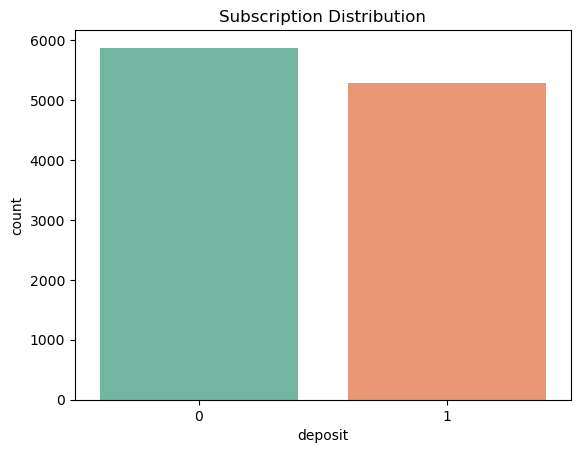

In [6]:
sns.countplot(x='deposit', data=df, palette='Set2')
plt.title("Subscription Distribution")
plt.show()

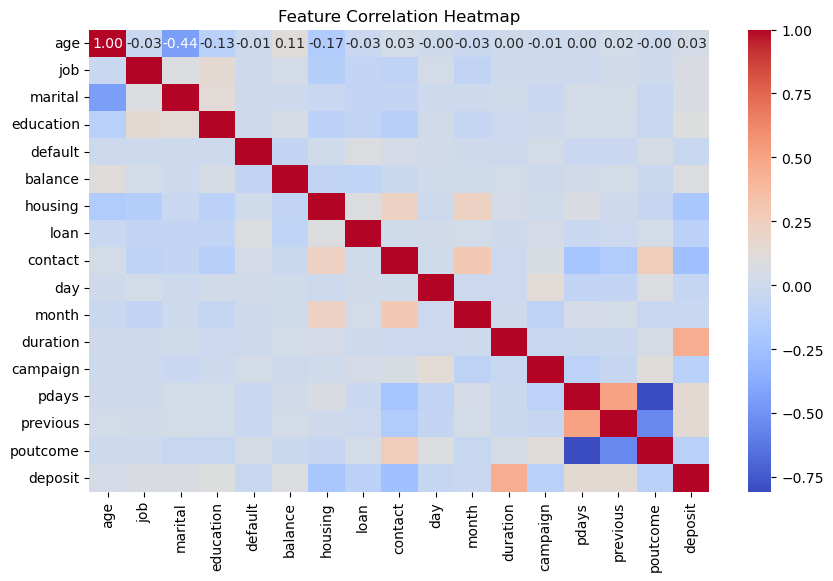

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Split Dataset**

In [8]:
X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Random Forest Model**

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Evaluate Model**

In [10]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8334079713390058

 Confusion Matrix:
 [[952 214]
 [158 909]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



**ROC Curve**

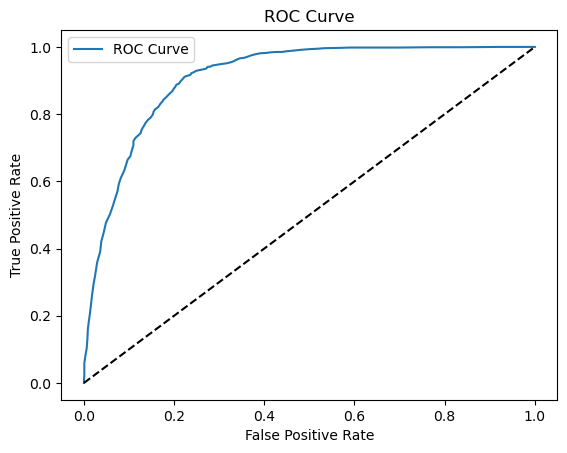

ROC AUC Score: 0.9097025854377626


In [11]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

**Explain Predictions with SHAP**

In [13]:
import shap

# Use the new universal Explainer
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

100%|===================| 4462/4466 [05:36<00:00]        

In [ ]:
# Now plot summary
shap.plots.bar(shap_values)

## Final Insights

- Our model achieve83y]% accuracy in predicting deposit subscription.
- Most influential features (from SHAP & correlation):
  - Duration
  - Contact
  - Month
  - Pdays
- Customers with long call durations and recent contact were more likely to subscribe.
